![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

In [2]:
ser_val = pd.Series([3,5,8], index=["a","b","c"])

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [3]:
ser_pop = pd.Series([65,300,8,1200], index=["France", "USA", "Suisse","Chine"])

In [4]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(ser_pop) == pd.Series
print("Bien créée !")

Bien créée !


In [5]:
ser_pop[ser_pop > 50]

France      65
USA        300
Chine     1200
dtype: int64

In [6]:
# on construit une série avec les populations de plus de 50
ser_pop_l50 = ser_pop[ser_pop > 50]

In [7]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert ser_pop_l50.min() >= 50
print("Bravo !")

Bravo !


In [8]:
ser_pop_50_200 = ser_pop[(ser_pop > 50) & (ser_pop<200)]
ser_pop_50_200

France    65
dtype: int64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [9]:
ser_pop.name = "populations"
ser_pop.index.name = "pays"
ser_pop

pays
France      65
USA        300
Suisse       8
Chine     1200
Name: populations, dtype: int64

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [10]:
ser_manquante = pd.Series([2,np.nan,4],index=['a','b','c'])

In [11]:
ser_manquante.mean()

3.0

In [12]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c'])).sum()

1

In [13]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c'])).sum()

2

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

In [14]:
import datetime

In [15]:
datetime.date.today()

datetime.date(2021, 3, 12)

In [16]:
datetime.datetime.now()

datetime.datetime(2021, 3, 12, 10, 31, 1, 476138)

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

*Indice :* Utilisez les informations ci-dessus

On utilisera :
```
pd.date_range(___)
np.random.randn(___)
pd.Series(___)
```

In [17]:
dates = pd.date_range(start= "2017-10-03", end=datetime.date.today(), freq="D")

In [18]:
data = np.random.randn(len(dates))

<AxesSubplot:>

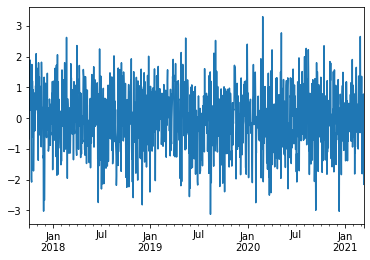

In [19]:
serie_temp = pd.Series(data = data, index = dates)
serie_temp.plot()

In [20]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert len(serie_temp) == len(dates)
print("Bravo !")

Bravo !


# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [21]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,0.541044,0.647846
obs_1,0.705966,-0.453439
obs_2,-0.004613,-2.170331
obs_3,0.009845,0.887217
obs_4,-1.769676,-0.175992


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [22]:
frame1.shape

(5, 2)

In [23]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


In [24]:
def affiche_moyenne(frame1):
    for col in frame1.columns:
        print(col, frame1[col].mean())

In [25]:
affiche_moyenne(frame1)

col_0 -0.10348667045755855
col_1 -0.2529397211851539


In [26]:
frame1["col_0"]

obs_0    0.541044
obs_1    0.705966
obs_2   -0.004613
obs_3    0.009845
obs_4   -1.769676
Name: col_0, dtype: float64

In [27]:
frame1.col_0

obs_0    0.541044
obs_1    0.705966
obs_2   -0.004613
obs_3    0.009845
obs_4   -1.769676
Name: col_0, dtype: float64

In [28]:
frame1.loc[["obs_2","obs_4"],"col_1"]

obs_2   -2.170331
obs_4   -0.175992
Name: col_1, dtype: float64

In [29]:
frame1.iloc[2:5,1]

obs_2   -2.170331
obs_3    0.887217
obs_4   -0.175992
Name: col_1, dtype: float64

# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [30]:
frame1.head(3)

,col_0,col_1
obs_0,0.541044,0.647846
obs_1,0.705966,-0.453439
obs_2,-0.004613,-2.170331


Pour afficher un résumé du DF :

In [31]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   5 non-null      float64
 1   col_1   5 non-null      float64
dtypes: float64(2)
memory usage: 292.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [32]:
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv")

/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert airbnb["price"].dtype == object
print("Bien importé !")

Bien importé !


In [34]:
airbnb.info(verbose=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 47.8+ MB


In [35]:
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = 150

In [36]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,NaN,RER B Metro Ligne 13 Pernety Metro Ligne 13 Pl...,"A la demande, vous pouvez avoir accès à la cha...",yes I can help you out,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/baeae9e2-c...,NaN,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, Île-de-France, France",NaN,within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Paris, Île-de-France, France",Alésia,Observatoire,NaN,Paris,Île-de-France,75014,Paris,"Paris, France",FR,France,48.83349,2.31852,f,Apartment,Entire home/apt,2,1.0,0.0,0.0,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",NaN,$75.00,$490.00,NaN,$0.00,$50.00,1,$0.00,3,15,3,3,15,15,3.0,15.0,3 weeks ago,t,0,0,27,288,2019-05-07,8,3,2016-12-27,2018-12-19,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,{PARIS},f,f,flexible,f,f,1,1,0,0,0.28
1,5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",The staircase leading up to the apartment is n...,The flat is close to two or three major metro ...,"The flat includes its own modern bathroom, a w...",We expect guests to operate rather independent...,This is a small flat in a very old building th...,NaN,NaN,https://a0.muscache.com/im/pictures/52413/f9bf...,NaN,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"Istanbul, İstanbul, Turkey",We are both journalists based in the Middle Ea...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/7903/profile_...,https://a0.muscache.com/im/users/7903/profile_...,Saint-Paul - Ile Saint-Louis,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,"Paris, Ile-de-France, France",IV Arrondissement,Hôtel-de-Ville,NaN,Paris,Ile-de-Fr

Importer un fichier `.csv` qui a comme séparateur `;`, le nom du fichier est `base-dpt.csv`

In [37]:
base_dpt = pd.read_csv("./data/base-dpt.csv", sep=";")

In [38]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(base_dpt) == pd.DataFrame
print("Bien importé !")

Bien importé !


In [39]:
base_dpt.head()

,CODGEO,LIBGEO,REG,DEP,P14_POP,P09_POP,SUPERF,NAIS0914,DECE0914,P14_MEN,NAISD16,DECESD16,P14_LOG,P14_RP,P14_RSECOCC,P14_LOGVAC,P14_RP_PROP,NBMENFISC14,PIMP14,MED14,TP6014,P14_EMPLT,P14_EMPLT_SAL,P09_EMPLT,P14_POP1564,P14_CHOM1564,P14_ACT1564,ETTOT15,ETAZ15,ETBE15,ETFZ15,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015,Geo Shape,geo_point_2d
0,95555,Saint-Gratien,11,95,20996.0,20258.0,2.42,1564.0,749.0,8909.817815,257.0,156.0,9337.392497,8909.817815,56.919890,370.654792,4479.402681,8217.0,67.761158,21552.857143,14.972881,3831.135105,3224.519672,3516.342843,13417.955458,1387.832340,10146.844242,1475.0,3.0,38.0,142.0,1078.0,225.0,214.0,335.0,67.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.274621...","48.9695044801, 2.28470111182"
1,95488,Pierrelaye,11,95,8155.0,7920.0,9.21,639.0,243.0,2891.000000,152.0,46.0,3086.000000,2891.000000,11.000000,184.000000,1591.000000,2903.0,66.586290,21415.277778,14.387392,3039.646367,2661.250427,2898.932365,5476.000000,509.000000,4044.000000,878.0,8.0,47.0,135.0,623.0,241.0,65.0,228.0,72.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.193617...","49.0190794714, 2.1606870483"
2,95543,Saint-Cyr-en-Arthies,11,95,242.0,229.0,3.89,9.0,4.0,93.154812,1.0,1.0,106.271929,93.154812,7.063063,6.054054,86.066946,96.0,NaN,25937.142857,NaN,25.112024,18.060819,16.867783,141.757322,9.112971,109.355649,13.0,2.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.732068...","49.058878265, 1.74176317637"
3,95523,La Roche-Guyon,11,95,446.0,447.0,4.61,18.0,21.0,186.507593,0.0,6.0,267.570530,186.507593,49.216783,31.846154,113.442763,185.0,NaN,21100.000000,NaN,372.590626,338.427249,505.753210,280.164177,24.995863,204.811694,74.0,0.0,6.0,6.0,48.0,17.0,14.0,13.0,4.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.623323...","49.0883415268, 1.63442788467"
4,95678,Villiers-Adam,11,95,838.0,828.0,9.82,45.0,29.0,340.831981,5.0,9.0,364.250976,340.831981,9.860629,13.558365,299.077636,327.0,NaN,28242.000000,NaN,102.752654,83.329975,78.177577,516.588644,33.986095,400.064890,75.0,6.0,3.0,8.0,53.0,12.0,5.0,14.0,2.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.236020...","49.0697597649, 2.23847351378"


In [40]:
base_dpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CODGEO         1300 non-null   int64  
 1   LIBGEO         1300 non-null   object 
 2   REG            1300 non-null   int64  
 3   DEP            1300 non-null   int64  
 4   P14_POP        1297 non-null   float64
 5   P09_POP        1297 non-null   float64
 6   SUPERF         1297 non-null   float64
 7   NAIS0914       1297 non-null   float64
 8   DECE0914       1297 non-null   float64
 9   P14_MEN        1297 non-null   float64
 10  NAISD16        1296 non-null   float64
 11  DECESD16       1296 non-null   float64
 12  P14_LOG        1297 non-null   float64
 13  P14_RP         1297 non-null   float64
 14  P14_RSECOCC    1297 non-null   float64
 15  P14_LOGVAC     1297 non-null   float64
 16  P14_RP_PROP    1297 non-null   float64
 17  NBMENFISC14    1280 non-null   float64
 18  PIMP14  

In [41]:
frame1.to_csv("frame1.csv")

# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/> 

In [42]:
web_bank = pd.read_html("https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/")
print(type(web_bank), len(web_bank))

<class 'list'> 1


In [43]:
frame_bank = web_bank[0]

In [44]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(frame_bank) == pd.DataFrame
print("Bien importé !")

Bien importé !


In [45]:
frame_bank.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020"
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020"
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"


In [46]:
# un autre exemple
web_us = pd.read_html("https://fr.wikipedia.org/wiki/Liste_des_r%C3%A9sultats_des_%C3%A9lections_pr%C3%A9sidentielles_am%C3%A9ricaines")

In [47]:
len(web_us)

23

In [48]:
web_us[1]

,Unnamed: 0,Nombre de présidents élus,1er Président,Dates,Dernier Président,Dates.1
0,Parti républicain,24,Abraham Lincoln,1860-1868,Donald Trump,2016-2020
1,Parti démocrate,23,Andrew Jackson,1828-1836,Joe Biden,2020-en cours
2,Parti républicain-démocrate,7,Thomas Jefferson,1800-1808,John Quincy Adams,1824-1828
3,Parti Whig,2,William Henry Harrison,1840-1844,Zachary Taylor,1848-1852
4,Parti fédéraliste,1,John Adams,1796-1800,John Adams,1796-1800


# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

1- avec `pd.read_excel()` pour le fichier `credit2.xlsx`

In [49]:
credit2 = pd.read_excel("./data/credit2.xlsx",sheet_name='Sheet1')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


In [50]:
type(credit2)

pandas.core.frame.DataFrame

In [51]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert credit2["Age"].max() == 83
print("Bravo !")

Bravo !


2- avec `pd.ExcelFile()` pour le fichier `ville.xls`

In [52]:
ville_excel = pd.ExcelFile("./data/ville.xls")


In [53]:
ville_excel.sheet_names

['ville', 'ville-ain']

In [54]:
frame_ville = ville_excel.parse("ville")

In [55]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(frame_ville) == pd.DataFrame
print("Bravo !")

Bravo !


# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [56]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

*Indice :* On commence par créer la connexion et ensuite on fait la requête `select * from salaries`, la connexion se fait en utilisant l'adresse : "sqlite:///./data/salaries.sqlite"

In [57]:
connexion = create_engine("sqlite:///./data/salaries.sqlite")

In [58]:
connexion.table_names()

['Salaries']

In [59]:
salaries = pd.read_sql_query("select * from salaries",connexion)

In [60]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(salaries) == pd.DataFrame
print("Bravo !")

Bravo !


In [61]:
salaries.shape

(148654, 13)

In [62]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,


## Importer des données SAS

Les données SAS ont un format propriétaire qui est bien souvent difficile à gérer dans d'autres outils.

Pandas peut gérer des fichiers SAS en utilisant la fonction `pd.read_sas(___)` 

**Exercice :**
Importez le fichier `bce_uai.sas7bdat` en utilisant pandas

*Indice :* L'encodage des chaînes de caractères est spécifique en SAS, on utilisera l'option `encoding='latin-1'`

In [63]:
bce_uai = pd.read_sas("./data/bce_uai.sas7bdat", encoding = "latin-1")

In [64]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(bce_uai) == pd.DataFrame
print("Bravo !")

Bravo !


In [65]:
bce_uai["DENOMINATION_PRINCIPALE_UAI"].value_counts()

ECOLE ELEMENTAIRE PUBLIQUE      16211
ECOLE MATERNELLE PUBLIQUE       14467
ECOLE PRIMAIRE PUBLIQUE         13744
COLLEGE                          5383
ECOLE PRIMAIRE PRIVEE            3884
                                ...  
LYCÉE AGRICOLE PRIVÉ D'ALZON        1
ÉCOLE ELEMENTAIRE PUBLIQUE          1
LYC PROF HORTICOLE                  1
LYCEE PROFESSESSIONNEL              1
ROSE DES VENTS                      1
Name: DENOMINATION_PRINCIPALE_UAI, Length: 645, dtype: int64

## Manipulation de données avec Pandas

### Ajouter une colonne

Ajouter une variable en pandas est simple :
    
`df["new_a"] = df["a"] * 2`

Avec une condition :
    
`df.loc[df["a"]>0, "new_a"] = 10`

ou 

`df["b"] = np.where(df["a"]<0, 1,0)`


**Exercice :** Construire une nouvelle colonne à partir de la colonne "zipcode" avec des 1 pour chaque valeur égales à 75015.

In [66]:
airbnb["zipcode"].unique()

array(['75014', '75004', '75020', '75001', '75011', '75018', '75008',
       '75005', '75013', '75006', '75010', '75009', '75007', '75012',
       '75002', '75017', '75015', '75019', '75003', '75016', '75116',
       '94160', nan, '92300', '95170', '94300', '92240', '92100', '92130',
       '75018e', '93170', '75011\n75011', '93500', '94270', '92200',
       '93310', '92170', 'Paris 75004', '78008', '92120', '75', '94220',
       '700014', '92110', '93400', '94250', 75005.0, 75017.0, 75011.0,
       75019.0, 92100.0, 75003.0, 75009.0, 75013.0, 75010.0, 75018.0,
       75020.0, 75001.0, 75007.0, 75006.0, 75015.0, 75012.0, 75004.0,
       75008.0, 75016.0, 75116.0, 75014.0, 75002.0, 92130.0, 75.0,
       92120.0, 93170.0, 92200.0, 92300.0, 94160.0, 94130.0, 94300.0,
       93300.0, 94250.0, 74400.0, 94200.0, 76016.0, 750109.0, 94220.0,
       93400.0, 93100.0, 92110.0, 75000.0, 93310.0, 92240.0, 94410.0,
       92170.0, '94200', '75003\n75003', '94410', '93300', '94130', 'N',
       9350

In [67]:
airbnb["zipcode"]= airbnb["zipcode"].astype(str)
airbnb["is_75015"] = np.where(airbnb["zipcode"].str.find("75015") > -1, 1,0)

In [68]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert  airbnb["is_75015"].max() == 1
print("Bravo !")

Bravo !


In [69]:
airbnb[airbnb["is_75015"]==1].shape

(4299, 107)

Modifier ce qui est dans une colonne est simple en pandas, si on utilise un type spécial, on utilisera :
    
- pour une donnée textuelle :
    `df["col_test"].str.___`, ___ peut être remplacé par n'importe quelle méthode liée aux chaînes de caractères

- pour une donnée de date :
    `df["col_test"].dt.___`, ___ peut être remplacé par n'importe quelle méthode liée aux objets datetime de python

    

**Exercice :** Extraire deux colonnes avec le jour et le mois à partir de la colonne DATE_OUVERTURE du data frame bce_uai en utlisant `.dt.day` et `.dt.month`

In [70]:
bce_uai["DATE_OUVERTURE"].dt.day_name()

0           Friday
1           Friday
2         Saturday
3         Saturday
4           Friday
           ...    
67436    Wednesday
67437       Friday
67438     Saturday
67439      Tuesday
67440     Saturday
Name: DATE_OUVERTURE, Length: 67441, dtype: object

In [71]:
bce_uai["jour_ouverture"] = bce_uai["DATE_OUVERTURE"].dt.day
bce_uai["mois_ouverture"] = bce_uai["DATE_OUVERTURE"].dt.month
bce_uai["jour_sem_ouverture"] = bce_uai["DATE_OUVERTURE"].dt.day_name()

<AxesSubplot:>

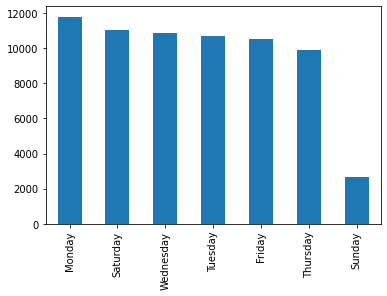

In [72]:
bce_uai["jour_sem_ouverture"].value_counts().plot.bar()

<AxesSubplot:>

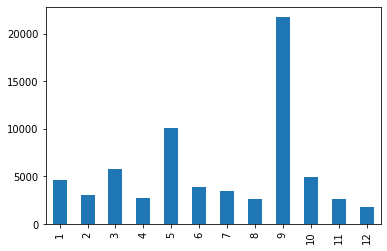

In [73]:
bce_uai["mois_ouverture"].value_counts().sort_index().plot.bar()

In [74]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert  bce_uai["jour_ouverture"].min() == 1
print("Bravo !")

Bravo !


# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

In [75]:
salaries[ ["BasePay", "JobTitle"] ].head()

,BasePay,JobTitle
0,167411.18,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,155966.02,CAPTAIN III (POLICE DEPARTMENT)
2,212739.13,CAPTAIN III (POLICE DEPARTMENT)
3,77916,WIRE ROPE CABLE MAINTENANCE MECHANIC
4,134401.6,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"


**Exercice :** 
    
Triez les données sur les salaires en se basant sur le BasePay et le JobTitle

In [76]:
salaries_sorted = salaries.sort_values(["JobTitle", "BasePay"],ascending=[True, False])

In [77]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert salaries_sorted["JobTitle"].min() == salaries_sorted["JobTitle"].iloc[0]
print("Bravo !")

Bravo !


## Exportez des fichiers 

La plupart des outils d'importation existent en exportation, on utilise :
```
frame.to_csv("fichier.csv")
```


**Exercice :**
    
Exportez les données salaries dans un fichier Excel

In [78]:
salaries.to_excel("salaries.xlsx")

# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

In [79]:
salaries.describe(include="all")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
count,148654.000000,148654,148654,148654.0,148654.0,148654.0,148654,148654.000000,148654.000000,148654.000000,148654,148654,148654
unique,NaN,110811,2159,109491.0,65999.0,83226.0,98467,NaN,NaN,NaN,1,1,3
top,NaN,Kevin Lee,Transit Operator,0.0,0.0,0.0,,NaN,NaN,NaN,,San Francisco,
freq,NaN,13,7036,1298.0,77321.0,41600.0,36159,NaN,NaN,NaN,148654,148654,110535
mean,74327.500000,NaN,NaN,NaN,NaN,NaN,NaN,74768.321972,93692.554811,2012.522643,NaN,NaN,NaN
std,42912.857795,NaN,NaN,NaN,NaN,NaN,NaN,50517.005274,62793.533483,1.117538,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-618.130000,-618.130000,2011.000000,NaN,NaN,NaN
25%,37164.250000,NaN,NaN,NaN,NaN,NaN,NaN,36168.995000,44065.650000,2012.000000,NaN,NaN,NaN
50%,74327.500000,NaN,NaN,NaN,NaN,NaN,NaN,71426.610000,92404.090000,2013.000000,NaN,NaN,NaN
75%,111490.750000,NaN,NaN,NaN,NaN,NaN,NaN,105839.135000,132876.450000,2014.000000,NaN,NaN,NaN


In [80]:
# transfo en numérique
salaries["BasePay"] = pd.to_numeric(salaries["BasePay"].replace("Not Provided", np.nan))

**Exercice :**
    
Obtenir les moyennes et variances de la colonne `TotalPay` pour les données Salaries.


In [81]:
def ma_stat(x):
    return x.mean()/x.max()

In [82]:
salaries[["TotalPay","BasePay"]].agg(["mean", "var", ma_stat])

,TotalPay,BasePay
mean,7.476832e+04,6.632545e+04
var,2.551968e+09,1.828814e+09
ma_stat,1.317282e-01,2.077377e-01


**Exercice ++ :**

Calculer la moyenne des prix des appartements airbnb

*Attention :* la colonne `price`a des problèmes

In [83]:
airbnb["price"]

0         $75.00
1        $115.00
2        $115.00
3         $90.00
4         $75.00
          ...   
59121     $50.00
59122    $350.00
59123     $80.00
59124     $32.00
59125     $60.00
Name: price, Length: 59126, dtype: object

Le type 'O' est apppelé objet et n'est donc pas nmérique (donc pas de moyenne !!)

On commence par trasformer en numérique !

Deux indices :
- on peut utiliser la fonction `pd.to_numeric(___)`
- une colonne de texte a de nombreuses méthode, si on veut remplacer dans une colonne de texte, on utiliser : `data["colonne"].str.replace(___,___)`

In [84]:
# on ajoute une colonne à la fin du dataframe :
airbnb["price_num"] = pd.to_numeric(airbnb["price"].str.replace("$","").str.replace(",",""))

print(airbnb["price_num"].mean())

116.32598180157629


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [85]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert airbnb["price_num"].max() == 9379
print("Bravo !")

Bravo !


# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


In [86]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [87]:
salaries["BasePay"] = salaries["BasePay"].fillna(salaries["BasePay"].median())

In [88]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2). On commence par importer `credit1.txt`


In [89]:
credit2.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID
0,40,F,S,11,6,37,56,37073,F,5409
1,47,M,M,13,13,30,56,50721,F,5477
2,35,F,U,1,9,33,57,43578,T,5507
3,45,M,U,15,7,30,62,69553,F,8
4,13,F,S,0,7,27,64,37502,T,158


In [90]:
credit1 = pd.read_table("./data/credit1.txt", index_col = "Customer_ID")
credit1.head()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Has_Bad_Payment_Record,Members_Within_Household,Number_of_Call_Center_Contacts,Weeks_Since_Last_Offer,Accepted_Personal_Loan,Accepted_Retention,Accepted_Home_Equity_Loan,Accepted_Credit_Card,Annual_value,Interested_in_Personal_Loan,Interested_in_Retention,Interested_in_Home_Equity_Loan,Interested_in_Credit_Card
Customer_ID,,,,,,,,,,,,,,,,,,,,,
5409,24,3,10,229,2,40,13,0,0,5,9,17,F,F,F,F,90,F,F,F,F
5477,12,2,12,8,1,47,5,2,0,4,9,22,F,F,F,F,260,F,F,F,F
5507,36,0,0,0,0,35,31,0,0,4,0,27,F,F,T,T,0,F,F,T,F
8,0,0,0,0,0,45,-3,0,0,1,11,51,F,F,F,F,0,F,T,F,F
158,48,0,0,0,0,13,39,0,0,6,11,8,F,F,F,F,0,F,F,T,F


In [91]:
credit_merged = pd.merge(credit1,credit2, left_index=True, right_on="Customer_ID", how = 'inner', suffixes=("_left", "_right"))

In [92]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert credit_merged.shape[1] == 31
print("Bravo !")

Bravo !


In [93]:
credit_merged.head()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Has_Bad_Payment_Record,Members_Within_Household,Number_of_Call_Center_Contacts,Weeks_Since_Last_Offer,Accepted_Personal_Loan,Accepted_Retention,Accepted_Home_Equity_Loan,Accepted_Credit_Card,Annual_value,Interested_in_Personal_Loan,Interested_in_Retention,Interested_in_Home_Equity_Loan,Interested_in_Credit_Card,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID
0,24,3,10,229,2,40,13,0,0,5,9,17,F,F,F,F,90,F,F,F,F,40,F,S,11,6,37,56,37073,F,5409
1,12,2,12,8,1,47,5,2,0,4,9,22,F,F,F,F,260,F,F,F,F,47,M,M,13,13,30,56,50721,F,5477
2,36,0,0,0,0,35,31,0,0,4,0,27,F,F,T,T,0,F,F,T,F,35,F,U,1,9,33,57,43578,T,5507
3,0,0,0,0,0,45,-3,0,0,1,11,51,F,F,F,F,0,F,T,F,F,45,M,U,15,7,30,62,69553,F,8
4,48,0,0,0,0,13,39,0,0,6,11,8,F,F,F,F,0,F,F,T,F,13,F,S,0,7,27,64,37502,T,158


# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

In [94]:
pd.cut(credit_merged["Age"], 5).value_counts()

(24.6, 39.2]     845
(39.2, 53.8]     722
(9.927, 24.6]    204
(53.8, 68.4]     187
(68.4, 83.0]      42
Name: Age, dtype: int64

In [95]:
pd.cut(credit_merged["Age"], [0,18,25,35,45,60,100]).value_counts()

(35, 45]     716
(25, 35]     501
(45, 60]     436
(18, 25]     168
(60, 100]    113
(0, 18]       66
Name: Age, dtype: int64

In [96]:
pd.qcut(credit_merged["Age"], 5).value_counts()

(9.999, 30.0]    451
(41.0, 49.0]     427
(36.0, 41.0]     390
(30.0, 36.0]     367
(49.0, 83.0]     365
Name: Age, dtype: int64

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir 5 niveaux de prix.

In [97]:
airbnb["price_disc"] = pd.qcut(airbnb['price_num'],5)

In [98]:
assert airbnb["price_disc"].dtype == "category"
print("Bravo !")

Bravo !


<AxesSubplot:>

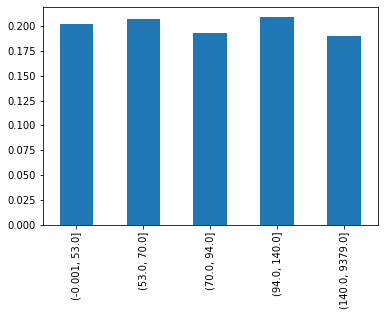

In [99]:
airbnb["price_disc"].value_counts(normalize=True).sort_index().plot.bar()

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB. On croise `cancellation_policy` et `room_type` et on compte les occurences et stockez le

In [100]:
airbnb.pivot_table(index="cancellation_policy", columns = "room_type", aggfunc=["count","mean"], values="price_num")

count                           \
room_type                   Entire home/apt Private room Shared room   
cancellation_policy                                                    
flexible                            16789.0       3734.0       218.0   
moderate                            16120.0       2020.0        71.0   
strict                                  2.0          NaN         NaN   
strict_14_with_grace_period         17813.0       1717.0       178.0   
super_strict_30                       128.0         33.0         NaN   
super_strict_60                       280.0         23.0         NaN   

                                       mean                           
room_type                   Entire home/apt Private room Shared room  
cancellation_policy                                                   
flexible                          95.350408   109.948313   73.564220  
moderate                         104.016005   125.259901   40.887324  
strict                            63.000000          NaN         NaN  
strict_14_with_grace_period      141.510807    92.999418   64.224719  
super_strict_30                  253.656250   541.363636         NaN  
super_strict_60                  590.639286   440.000000         NaN

# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


In [101]:
airbnb_gp_room = airbnb.groupby( "room_type")

In [102]:
airbnb_gp_room["price_num"].describe().T

room_type,Entire home/apt,Private room,Shared room
count,51132.000000,7527.000000,467.000000
mean,117.270613,113.091139,65.036403
std,155.259620,229.457124,262.244490
min,0.000000,8.000000,9.000000
25%,60.000000,40.000000,25.000000
50%,85.000000,55.000000,34.000000
75%,125.000000,85.000000,50.000000
max,9379.000000,8932.000000,5000.000000


**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [103]:
salaries["JobTitle"] = salaries["JobTitle"].str.lower()
salaries.groupby("JobTitle")["TotalPay"].agg(["mean", "count"]).sort_values("count")

,mean,count
JobTitle,,
zoo curator,66686.560000,1
"principal investigator, tax collector",84196.820000,1
heavy equipment operations assistant supervisor,92872.000000,1
"captain, bureau of fire prevention and public safe",206704.630000,1
"captain, (fire department)",35332.780000,1
...,...,...
firefighter,144222.334675,3153
custodian,45448.577343,3214
registered nurse,113466.920872,4955


# Exercice récapitulatif

Dans une fonction, on pourra utiliser directement le code d'exploration avec peu de changements.

**Exercice :**
Construire une fonction capable de charger des données, de les transformer et de sauvegarder le résultat dans un fichier

*Quelques indications*

On utilisera python et pandas, on complètera la fonction ci-dessous :

In [104]:
import os
os.path.join("./","data", "airbnb.csv")


'./data/airbnb.csv'

In [105]:
import os

def transfo(file_name, 
            folder_name,
            output_file_name,
            output_folder_name,
            sep_csv = ","
           ):
    """
    This function should load a file (csv), clean it and export it to Excel
    Here are the steps:
     - Remove missing values 
     - Transform dates to Python date format
     - Drop duplicated rows
    This function should return 0 if all OK / 1 if error
    """
    try:
        # on commence par importer la donnée en vérifiant qu'elle se trouve dans le répertoire voulu
        # pd.read_csv()
        file_input = os.path.join(folder_name,file_name)
        df = pd.read_csv(file_input, sep=sep_csv)

        # on applique les transformations en utlisant les outils de pandas
        # on supprime les données manquantes
        # .dropna()
        df = df.dropna()
        
        # on essaye de transformer les colonnes de date en format date python
        # pd.to_datetime()
        # si le terme "date" est compris dans le nom de la colonne
        for col_name in df.columns:
            if "date" in col_name.lower():
                df[col_name] = pd.to_datetime(df[col_name],
                                              errors = "ignore")
        
        # on supprime les doublons
        # .drop_duplicates()
        df = df.drop_duplicates()
        
        # on exporte les données en vérifiant l'existence du répertoire
        # .to_excel()
        file_output = os.path.join(output_folder_name,output_file_name)
        df.to_excel(file_output)
        return 0
    except FileNotFoundError:
        print("Attention problème de répertoire introuvable")
        return 1
    

In [106]:
transfo("housing.csv", 
            "./data",
            "housing.xlsx",
            "./data",
            sep_csv = ",")

0

In [107]:
# test du fonctionnement
assert transfo(file_name="base-dpt.csv", 
               folder_name="./data/",
               output_file_name="base-dpt.xlsx",
               output_folder_name="./data/", 
               sep_csv = ";") == 0
data_temp = pd.read_excel("./data/base-dpt.xlsx")
assert data_temp.isna().sum().all() == 0
print('Bravo!')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  import sys


Bravo!
